In [1]:
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

import os
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split

from data_manipulation.reading_util import load_and_extract_2nd_class
from data_manipulation.reading_util import load_all_sub_classes

load_dotenv()


2023-10-07 13:18:51.775589: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-07 13:18:51.843260: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-07 13:18:51.844036: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-07 13:18:52.595609: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


True

![Image of Split30](/home/malte/Desktop/Dataset/plots/class_count_comparison/SPLIT30.png)

In [2]:
emb_path = os.getenv("ESM2_ENZYMES_SPLIT_30")
csv_path = os.getenv("CSV30_ENZYMES")
wanted_ec = 1

# Extracting 2nd ec class form wanted main class
----

In [3]:
# for i in range(1,8):
#     X, y, sec_to_label, label_to_sec = load_and_extract_2nd_class(path_to_esm2=emb_path,
#                                                                   path_to_enzyme_csv=csv_path,
#                                                                   wanted_ec_class=i)
# 
#     sns.set(style="whitegrid")
#     plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
#     sns.countplot(x=y)
#     plt.xticks(list(label_to_sec.keys()), list(sec_to_label.keys()))
# 
#     # Add labels and title
#     plt.xlabel("2nd class")
#     plt.ylabel("Count")
#     plt.title(f"Second Ec Class Distribution for {i}. Main Class")
# 
#     # Show the plot
#     plt.show()


### Critical 2nd ec classes

| Class | Count |
|-------|-------|
| 1.10  | 10    |
| 1.20  | 8     |
| 1.23  | 2     |
| 1.97  | 7     |
| 2.2   | 19    |
| 2.9   | 5     | 
| 2.10  | 2     |
| 3.3   | 18    |
| 3.7   | 14    |
| 3.8   | 8     |
| 3.9   | 1     |
| 3.11  | 1     |
| 3.13  | 1     |
| 4.5   | 1     |
| 4.7   | 1     |
| 5.5   | 18    |
| 5.99  | 1     |
| 6.4   | 11    |
| 6.6   | 6     |
| 7.3   | 9     |
| 7.4   | 9     |
| 7.5   | 4     |
| 7.6   | 13    |
  
----


In [4]:
# Subclasses need at least 10 samples to be considered as specific label

ec_to_label = { 
    "1.1": 0,
    "1.2": 1, 
    "1.3": 2,
    "1.4": 3,
    "1.5": 4,
    "1.6": 5,
    "1.7": 6,
    "1.8": 7,
    "1.11": 8,
    "1.12": 9,
    "1.13": 10,
    "1.14": 11,
    "1.15": 12,
    "1.16": 13,
    "1.17": 14,
    "1.18": 15,
    "1.21": 16,
    "1.10": 17,
    "1.20": 17,
    "1.23": 17,
    "1.97": 17,
    "2.1": 18,
    "2.3": 19,
    "2.4": 20,
    "2.5": 21,
    "2.6": 22,
    "2.7": 23,
    "2.8": 24,
    "2.2": 25,
    "2.9": 25,
    "2.10": 25,
    "3.1": 26,
    "3.2": 27,
    "3.4": 28,
    "3.5": 29,
    "3.6": 30,
    "3.3": 31,
    "3.7": 31,
    "3.8": 31,
    "3.9": 31,
    "3.11": 31,
    "3.13": 31,
    "4.1": 32,
    "4.2": 33,
    "4.3": 34,
    "4.4": 35,
    "4.6": 36,
    "4.99": 37,
    "4.7": 37,
    "4.5": 37,
    "5.1": 38,
    "5.2": 39,
    "5.3": 40,
    "5.4": 41,
    "5.5": 42,
    "5.6": 43,
    "5.7": 43,
    "5.99": 43,
    "6.1": 44,
    "6.2": 45,
    "6.3": 46,
    "6.5": 47,
    "6.4": 47,
    "6.6": 47,
    "7.1": 48,
    "7.2": 49,
    "7.3": 50,
    "7.4": 50,
    "7.5": 50,
    "7.6": 50,
}


label_to_ec = {
 0: "1.1" ,
 1: "1.2" ,
 2: "1.3" ,
 3: "1.4" ,
 4: "1.5" ,
 5: "1.6" ,
 6: "1.7" ,
 7: "1.8" ,
 8: "1.11" ,
 9: "1.12" ,
 10: "1.13" ,
 11: "1.14" ,
 12: "1.15" ,
 13: "1.16" ,
 14: "1.17" ,
 15: "1.18" ,
 16: "1.21" ,
 17: "1.10_20_23_97" ,
 18: "2.1" ,
 19: "2.3" ,
 20: "2.4" ,
 21: "2.5" ,
 22: "2.6" ,
 23: "2.7" ,
 24: "2.8" ,
 25: "2.2_9_19" ,
 26: "3.1" ,
 27: "3.2" ,
 28: "3.4" ,
 29: "3.5" ,
 30: "3.6" ,
 31: "3.3_7_8_9_11_13" ,
 32: "4.1" ,
 33: "4.2" ,
 34: "4.3" ,
 35: "4.4" ,
 36: "4.6" ,
 37: "4.99_7_5" ,
 38: "5.1" ,
 39: "5.2" ,
 40: "5.3" ,
 41: "5.4" ,
 42: "5.5" ,
 43: "5.6_7_99" ,
 44: "6.1" ,
 45: "6.2" ,
 46: "6.3" ,
 47: "6.5_4_6" ,
 48: "7.1" ,
 49: "7.2" ,
 50: "7.3_4_5_6" ,
}



In [5]:
print(len(ec_to_label))
print(len(label_to_ec))


print(len(set(ec_to_label.values())))
print(len(label_to_ec))


70
51
51
51


In [10]:
X, y, label_to_sec = load_all_sub_classes(emb_path, csv_path, allowed_labels=ec_to_label)


LOG: 3 Sequences with aa O in /home/malte/Desktop/Dataset/data/enzymes/csv/split30.csv
LOG: 15 Sequences with aa U in /home/malte/Desktop/Dataset/data/enzymes/csv/split30.csv
LOG: 203 multifunctional enzymes with diff ec main classes in /home/malte/Desktop/Dataset/data/enzymes/csv/split30.csv
LOG: 221 entries will be ignored
LOG: Data loaded in: 1.003 min
LOG: ESM2 of enzymes: 9204
LOG: Labels of enzymes: 9204


[ 0 23 23 10 19 23 38 26 48 26]
[0 0 0 0 0 0 0 0 0 0]


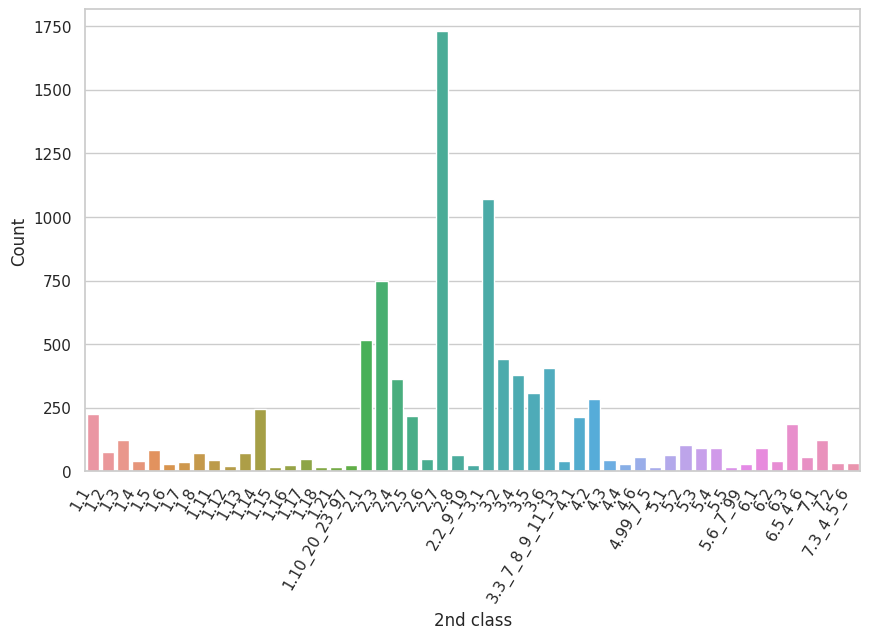

In [11]:
y_sorted = y.copy()
y_sorted.sort()
print(y[:10])
print(y_sorted[:10])
y_ec_classes = [label_to_ec[label] for label in y_sorted]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

countplot = sns.countplot(x=y_ec_classes)
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=60, horizontalalignment='right')

# Add labels and title
plt.xlabel("2nd class")
plt.ylabel("Count")

# Show the plot
plt.show()

# Training a CNN based on amount of y_labels
----

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Our labels need to be one hot encoded
# y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=len(sec_to_label))
# y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=len(sec_to_label))


y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=len(label_to_ec))
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=len(label_to_ec))



In [13]:
print(len(set(y_test)))
print(set(y_test))

51
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}


# Optimizing with Optuna
----

In [14]:
def objective(trial):
    # Define hyperparameters to be optimized
    num_units_dense_1 = trial.suggest_int('num_units_dense_1', 32, 512)
    dropout_rate_1 = trial.suggest_float('dropout_rate_1', 0.0, 0.7)
    num_units_dense_2 = trial.suggest_int('num_units_dense_2', 32, 256)
    dropout_rate_2 = trial.suggest_float('dropout_rate_2', 0.0, 0.7)
    num_units_dense_3 = trial.suggest_int('num_units_dense_3', 16, 128)

    # Create the model with the suggested hyperparameters
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=num_units_dense_1, activation='relu', input_shape=(2560,)))
    model.add(tf.keras.layers.Dropout(dropout_rate_1))
    model.add(tf.keras.layers.Dense(units=num_units_dense_2, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate_2))
    model.add(tf.keras.layers.Dense(units=num_units_dense_3, activation='relu'))
    
    model.add(tf.keras.layers.Dense(units=len(label_to_ec), activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Split your data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=len(label_to_ec))
    y_val_encoded = tf.keras.utils.to_categorical(y_val, num_classes=len(label_to_ec))

    # Define early stopping callback
    early_stop = tf.keras.callbacks.EarlyStopping(patience=10)

    # Train the model
    history = model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=25, callbacks=[early_stop], verbose=0)

    # Get the best validation loss
    val_loss = min(history.history['val_loss'])

    return val_loss


In [15]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=40)  # You can adjust the number of trials as needed

[I 2023-10-07 13:22:39,250] A new study created in memory with name: no-name-d00d5b8b-8d12-4967-ac31-688fd4c36f83
[I 2023-10-07 13:23:14,661] Trial 0 finished with value: 1.0031251907348633 and parameters: {'num_units_dense_1': 185, 'dropout_rate_1': 0.5115760716747657, 'num_units_dense_2': 253, 'dropout_rate_2': 0.03454775053903287, 'num_units_dense_3': 51}. Best is trial 0 with value: 1.0031251907348633.
[I 2023-10-07 13:23:41,309] Trial 1 finished with value: 1.01755690574646 and parameters: {'num_units_dense_1': 163, 'dropout_rate_1': 0.10496130770491414, 'num_units_dense_2': 192, 'dropout_rate_2': 0.40541825465868914, 'num_units_dense_3': 96}. Best is trial 0 with value: 1.0031251907348633.
[I 2023-10-07 13:24:07,209] Trial 2 finished with value: 1.0277713537216187 and parameters: {'num_units_dense_1': 127, 'dropout_rate_1': 0.5336453870128465, 'num_units_dense_2': 104, 'dropout_rate_2': 0.07169639708630332, 'num_units_dense_3': 83}. Best is trial 0 with value: 1.0031251907348633.

In [16]:
best_params = study.best_params
best_num_units_dense_1 = best_params['num_units_dense_1']
best_dropout_rate_1 = best_params['dropout_rate_1']
best_num_units_dense_2 = best_params['num_units_dense_2']
best_dropout_rate_2 = best_params['dropout_rate_2']
best_num_units_dense_3 = best_params['num_units_dense_3']

final_model = tf.keras.models.Sequential()
final_model.add(tf.keras.layers.Dense(units=best_num_units_dense_1, activation='relu', input_shape=(2560,)))
final_model.add(tf.keras.layers.Dropout(best_dropout_rate_1))
final_model.add(tf.keras.layers.Dense(units=best_num_units_dense_2, activation='relu'))
final_model.add(tf.keras.layers.Dropout(best_dropout_rate_2))
final_model.add(tf.keras.layers.Dense(units=best_num_units_dense_3, activation='relu'))

final_model.add(tf.keras.layers.Dense(units=len(label_to_ec), activation='softmax'))
final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Define early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(patience=50)

final_model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=250, callbacks=[early_stop], verbose=1)


Epoch 1/250
202/202 [==============================] - 4s 17ms/step - loss: 3.0145 - accuracy: 0.2110 - val_loss: 2.5098 - val_accuracy: 0.3483
Epoch 2/250
202/202 [==============================] - 3s 16ms/step - loss: 2.2107 - accuracy: 0.4339 - val_loss: 1.8430 - val_accuracy: 0.5311
Epoch 3/250
202/202 [==============================] - 3s 16ms/step - loss: 1.6987 - accuracy: 0.5675 - val_loss: 1.5078 - val_accuracy: 0.6260
Epoch 4/250
202/202 [==============================] - 3s 17ms/step - loss: 1.4067 - accuracy: 0.6355 - val_loss: 1.3146 - val_accuracy: 0.6741
Epoch 5/250
202/202 [==============================] - 3s 16ms/step - loss: 1.2087 - accuracy: 0.6894 - val_loss: 1.2326 - val_accuracy: 0.6814
Epoch 6/250
202/202 [==============================] - 3s 16ms/step - loss: 1.0794 - accuracy: 0.7077 - val_loss: 1.1769 - val_accuracy: 0.7078
Epoch 7/250
202/202 [==============================] - 3s 16ms/step - loss: 0.9925 - accuracy: 0.7282 - val_loss: 1.1184 - val_accuracy:

In [17]:
# Initializing the model
# model = tf.keras.models.Sequential()
# 
# earl_stop = tf.keras.callbacks.EarlyStopping(patience=3)
# 
# # Adding input layer
# model.add(tf.keras.layers.Dense(units=256, activation='relu', input_shape=(2560,)))
# 
# # Adding hidden layer
# model.add(tf.keras.layers.Dropout(0.5))  # Adding dropout for regularization
# model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))  # Adding dropout for regularization
# model.add(tf.keras.layers.Dense(units=64, activation='relu'))
# 
# # Finally adding output layer using softmax as activation function
# model.add(tf.keras.layers.Dense(units=len(sec_to_label), activation='softmax'))  # Using softmax for multi-class classification
# 
# Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam')


In [18]:
# model.fit(x=X_train, y=y_train_encoded, epochs=30, validation_data=(X_test, y_test_encoded), callbacks = [earl_stop])

<Figure size 1000x600 with 0 Axes>

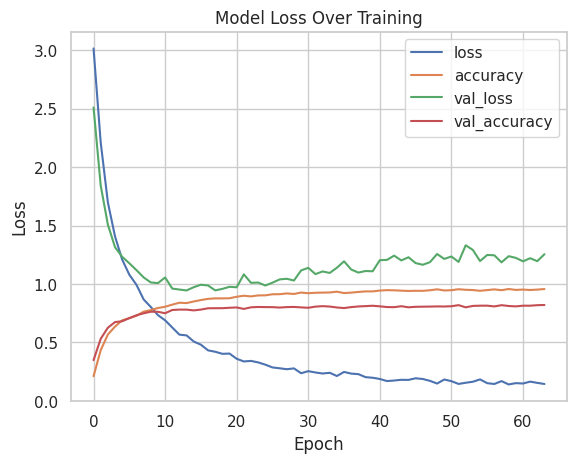

In [19]:
model_loss = pd.DataFrame(final_model.history.history)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
model_loss.plot()

plt.title('Model Loss Over Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [20]:
predictions = np.argmax(final_model.predict(X_test), axis=-1) 

87/87 [==============================] - 0s 3ms/step


In [21]:
report = classification_report(y_test, predictions, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        64
           1       0.82      0.67      0.73        27
           2       0.78      0.76      0.77        41
           3       0.33      0.22      0.27         9
           4       0.43      0.38      0.40        24
           5       0.14      0.33      0.20         6
           6       0.33      0.31      0.32        13
           7       0.87      0.50      0.63        26
           8       0.45      0.56      0.50         9
           9       0.50      0.33      0.40         3
          10       0.78      0.62      0.69        29
          11       0.93      0.81      0.86        79
          12       0.00      0.00      0.00         2
          13       0.60      0.60      0.60        10
          14       0.55      0.43      0.48        14
          15       0.33      0.12      0.18         8
          16       0.75      0.50      0.60         6
          17       0.57    

In [105]:
def plot_report(report, y, predictions, save_path, dpi=300):
    """
    Plots results of model
    :param report: Report of model
    """
    metrics = [] 
    class_labels = list(label_to_ec.values())
    class_output = []
    for i in range(2, len(report.split("\n"))-5):
        class_output.append(report.split('\n')[i].split()[0])
        metrics.append(report.split('\n')[i].split()[1:])

    precs = []
    recs = []
    f1_s = []

    for class_m in metrics:
        if len(class_m) != 0:
            precision = float(class_m[0])
            recall = float(class_m[1])
            f1_score = float(class_m[2])
            precs.append(precision)
            recs.append(recall)
            f1_s.append(f1_score)
        else:
            precision = 0
            recall = 0
            f1_score = 0
            precs.append(precision)
            recs.append(recall)
            f1_s.append(f1_score)


    # Plot accuracy for each class
    plt.figure(figsize=(10, 6))
    plt.bar(class_output, recs)
    plt.xticks(class_output, class_labels, rotation=90)
    plt.title("Recall")
    plt.xlabel("2nd EC Class")
    plt.tight_layout()
    
    
    if save_path:
        plt.savefig(f"{save_path}acc.png", dpi=dpi)
    else:
        plt.show()


    # Plot precision for each class
    plt.figure(figsize=(10, 6))
    plt.bar(class_output, precs)
    plt.xticks(class_output, class_labels, rotation=90)
    plt.title("Precision")
    plt.xlabel("2nd EC Class")
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f"{save_path}prec.png", dpi=dpi)
    else:
        plt.show()


    # Plot F1 score for each class
    plt.figure(figsize=(10, 6))
    plt.bar(class_output, f1_s)
    plt.xticks(class_output, class_labels, rotation=90)
    plt.title("F1 Score")
    plt.xlabel("2nd EC Class")

    # Adjust layout
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f"{save_path}f1.png", dpi=dpi)
    else:
        plt.show()


    conf_matrix = confusion_matrix(y, predictions)

    # Create a confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.set(font_scale=0.5)  # Adjust font size as needed
    
    heatmap = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
    # heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=15)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
    plt.title("Confusion Matrix")
    
    if save_path:
        plt.savefig(f"{save_path}conf.png", dpi=dpi)
    else:
        plt.show()



In [106]:
print(len(report.split("\n")))

58


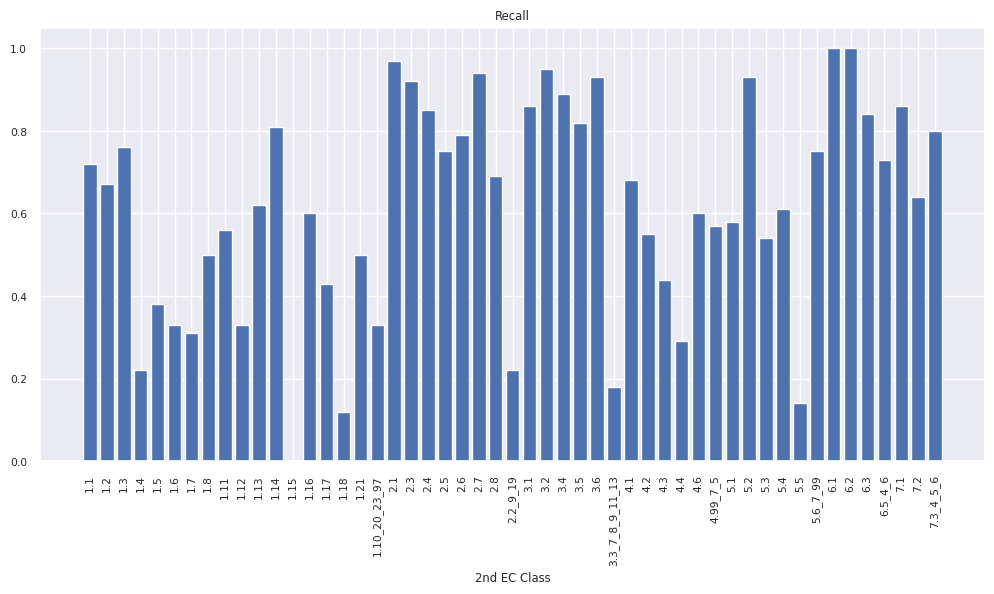

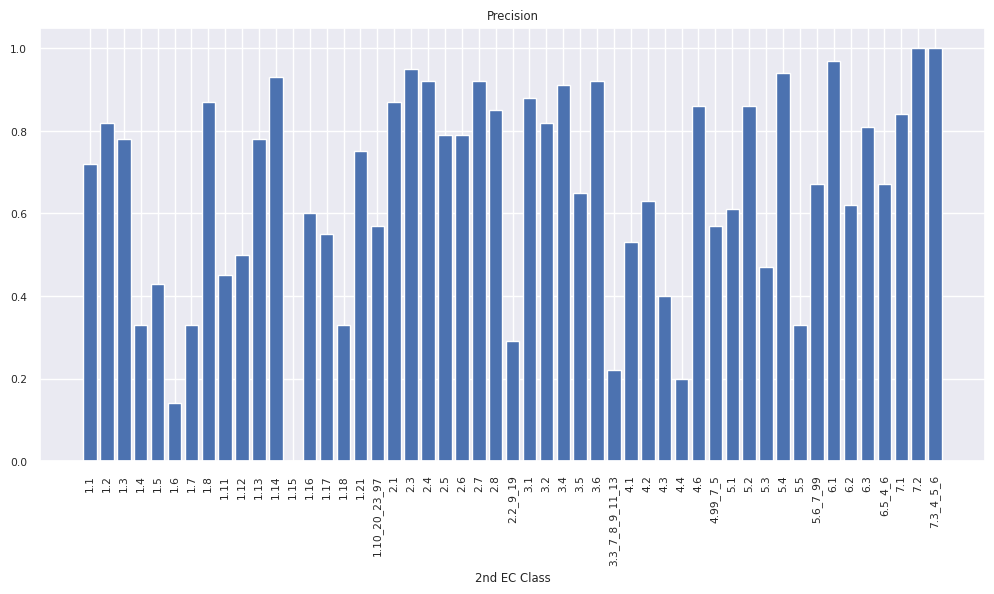

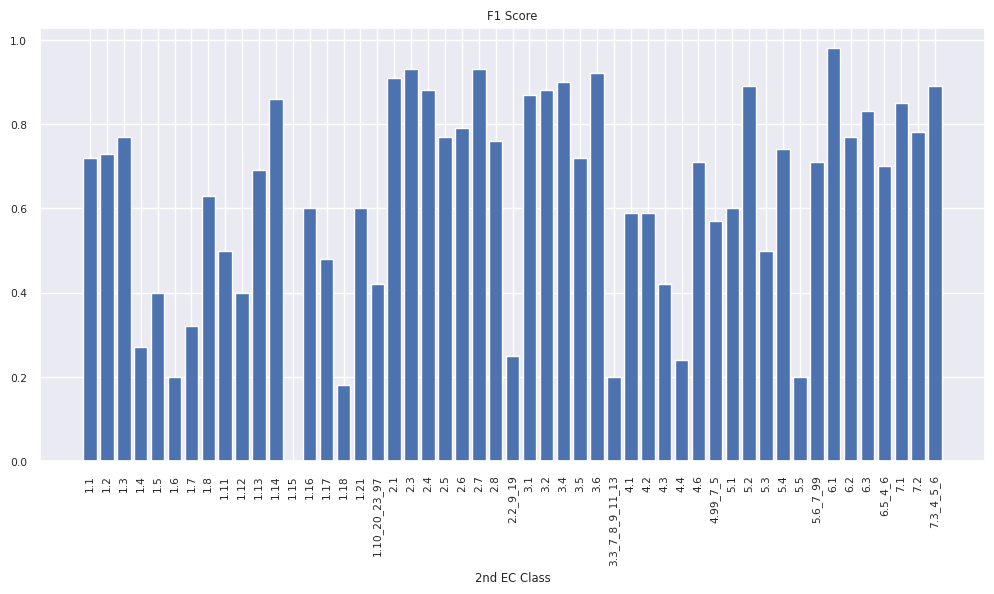

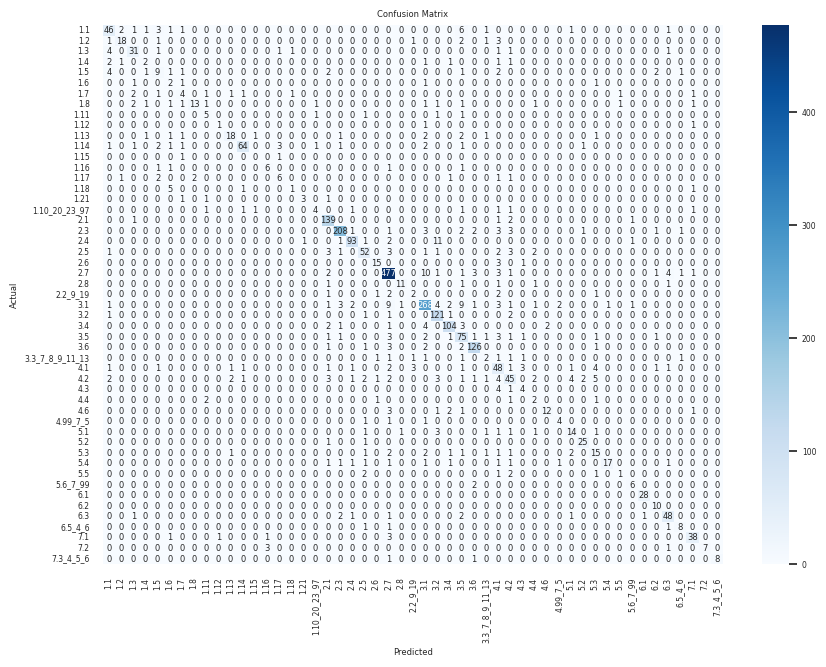

In [107]:
plot_report(report=report, y=y_test, predictions=predictions, save_path="/home/malte/01_Documents/projects/pbl_binary_classifier/tf_cnn_esm2/2nd_ec_class_pred/Plots/S30/PerformanceV1S30/",
            dpi=700)

In [108]:
tf.keras.models.save_model(final_model, "/home/malte/01_Documents/projects/pbl_binary_classifier/tf_cnn_esm2/2nd_ec_class_pred/Models/CNN_S30_OPT_V1_only_ez.keras")

